In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=e0dcd3fc5e5c37fbb8a149aac7d7740c817f9409441353d6e4552fe1ef1af769
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install detectlanguage

  Preparing metadata (setup.py) ... done
  Created wheel for detectlanguage: filename=detectlanguage-1.5.0-py3-none-any.whl size=3152 sha256=297deee397e59dec8fb480b1a490a0eb22f5b6a8519f9bcc7e8b94e38c3c70b5
  Stored in directory: /root/.cache/pip/wheels/3a/7e/9d/0cd88ffba0471168a1d377f61ba21e8f4cf653f1f3b7e0baae
Successfully built detectlanguage


In [ ]:
import pandas as pd
import detectlanguage
import matplotlib.pyplot as pl

In [ ]:
import pandas as pd
df1 = pd.read_table('ha_train.tsv')
df2 = pd.read_table('ha_dev_gold_label.tsv')
df = pd.concat([df1, df2],ignore_index=True)


In [ ]:
import detectlanguage

detectlanguage.configuration.api_key = "You API key"


In [ ]:
detectlanguage.detect("user Da kudin da Arewa babu wani abin azo aga")

[{'language': 'ha', 'isReliable': True, 'confidence': 10.68}]

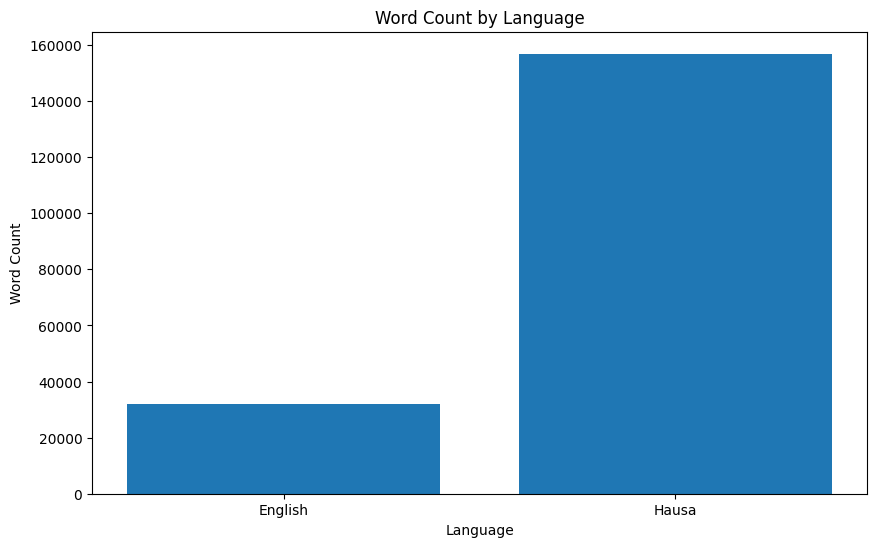

In [ ]:
import pandas as pd
import detectlanguage
import matplotlib.pyplot as plt

# Set up your API key for the detectlanguage library
detectlanguage.configuration.api_key = "You API key"

# Assuming you have a pandas DataFrame with a "tweet" column
# Create a function to count English and Hausa words in a tweet
def count_languages(tweet):
    result = detectlanguage.detect(tweet)
    english_count = 0
    hausa_count = 0

    for language in result:
        detected_language = language['language']
        if detected_language == 'en':
            # Split the tweet into words and count English words
            words = tweet.split()
            english_count += len(words)
        elif detected_language == 'ha':
            # Split the tweet into words and count Hausa words
            words = tweet.split()
            hausa_count += len(words)

    return english_count, hausa_count

# Apply the function to your DataFrame and create new columns
df['english_word_count'], df['hausa_word_count'] = zip(*df['tweet'].apply(count_languages))

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(['English', 'Hausa'], [df['english_word_count'].sum(), df['hausa_word_count'].sum()])
plt.xlabel('Language')
plt.ylabel('Word Count')
plt.title('Word Count by Language')
plt.show()
